<a href="https://colab.research.google.com/github/fardil-b/DL-PyTorch/blob/main/Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Validation

In [1]:
# Setting seeds to try and ensure we have the same results - this is not guaranteed across PyTorch releases.
import torch
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

import numpy as np
np.random.seed(0)

In [2]:
from torchvision import datasets, transforms
import torch.nn.functional as F
from torch import nn

mean, std = (0.5,), (0.5,)

# Create a transform and normalise data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean, std)
                              ])

# Download FMNIST training dataset and load training data
trainset = datasets.FashionMNIST('~/.pytorch/FMNIST/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download FMNIST test dataset and load test data
testset = datasets.FashionMNIST('~/.pytorch/FMNIST/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

Extracting /root/.pytorch/FMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/FMNIST/FashionMNIST/raw


Extracting /root/.pytorch/FMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/FMNIST/FashionMNIST/raw




Extracting /root/.pytorch/FMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/FMNIST/FashionMNIST/raw


Extracting /root/.pytorch/FMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/FMNIST/FashionMNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
class FMNIST(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 128)
    self.fc2 = nn.Linear(128,64)
    self.fc3 = nn.Linear(64,10)
    
  def forward(self, x):
    x = x.view(x.shape[0], -1)
    
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    x = F.log_softmax(x, dim=1)
    
    return x

model = FMNIST()

In [4]:
from torch import optim

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

num_epochs = 3

for i in range(num_epochs):
    cum_loss = 0

    for images, labels in trainloader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        cum_loss += loss.item()
     
    print(f"Training loss: {cum_loss/len(trainloader)}")


Training loss: 1.033817462257739
Training loss: 0.5608075980120885
Training loss: 0.49144349259926057


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

images, labels = next(iter(testloader))

test_image_id = 0 
img = images[test_image_id].view(1, 784) 

with torch.no_grad():
    logps = model(img)

In [6]:
ps = torch.exp(logps)
ps

tensor([[1.4947e-06, 5.2072e-07, 8.4638e-06, 8.7572e-07, 5.9631e-06, 1.9034e-01,
         4.8128e-06, 1.6186e-01, 4.4024e-03, 6.4337e-01]])

In [7]:
nps = ps.numpy()[0]
nps

array([1.4946592e-06, 5.2071726e-07, 8.4638323e-06, 8.7571510e-07,
       5.9630970e-06, 1.9034284e-01, 4.8128109e-06, 1.6185869e-01,
       4.4023544e-03, 6.4337403e-01], dtype=float32)

<BarContainer object of 10 artists>

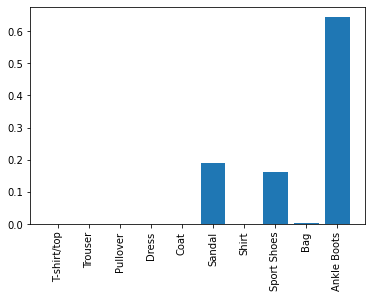

In [8]:
FMNIST_labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sport Shoes','Bag','Ankle Boots']
plt.xticks(np.arange(10),labels=FMNIST_labels,rotation='vertical')
plt.bar(np.arange(10), nps)

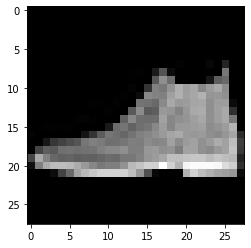

In [9]:
def denormalize(tensor):
  tensor = tensor*0.5 + 0.5
  return tensor
  
img = img.view(28,-1)
img = denormalize(img)
plt.imshow(img,cmap='gray')

we don't need to calculate any gradients, so let's do all this code within a torch no grad clause. We use the num correct variable to store the numbers where the predictions match the labels, and the total variable will track the number of images that we're testing. So we get the images and the labels from the test loader, and then what we do next is to do a forward pass through the model, and the predictions are stored in logps. Now remember that these are log values, so we need to use the exponent if we want to convert to a probability. Now we just want to make sure that everything's running okay for this batch of code, so I'll quit after just one pass by setting the condition: if count is greater than zero break. So let's run this cell of code and make sure everything's running as expected.

In [10]:
with torch.no_grad():
    num_correct = 0
    total = 0

    cnt = 0
    for images, labels in testloader:
        
        logps = model(images)
        output = torch.exp(logps)
        print(output)
        cnt+=1
        
        if cnt > 0:
          break

tensor([[1.4947e-06, 5.2072e-07, 8.4638e-06, 8.7571e-07, 5.9631e-06, 1.9034e-01,
         4.8128e-06, 1.6186e-01, 4.4024e-03, 6.4337e-01],
        [1.2067e-03, 4.7048e-05, 9.0751e-01, 1.9039e-04, 2.3424e-02, 1.1187e-05,
         6.6476e-02, 9.6473e-09, 1.1335e-03, 5.0377e-07],
        [1.1540e-05, 9.9983e-01, 2.9400e-05, 7.5093e-05, 5.5653e-05, 2.3286e-08,
         1.2187e-07, 4.7031e-07, 4.6748e-09, 9.1012e-09],
        [3.1344e-06, 9.9961e-01, 3.7278e-05, 3.0628e-04, 3.7186e-05, 1.6289e-07,
         9.5941e-08, 1.9733e-06, 9.4796e-09, 5.4921e-08],
        [1.1126e-01, 6.7339e-04, 1.7977e-01, 1.2636e-02, 1.5384e-02, 3.0360e-04,
         6.6952e-01, 1.5382e-06, 1.0434e-02, 1.5013e-05],
        [1.5503e-03, 9.8686e-01, 9.0931e-04, 1.9430e-03, 8.6355e-03, 5.6853e-07,
         9.2265e-05, 4.3993e-06, 1.5506e-06, 2.6347e-07],
        [1.0754e-02, 1.0587e-03, 5.5130e-02, 6.6391e-04, 7.9257e-01, 1.1842e-04,
         1.3782e-01, 7.7874e-07, 1.8809e-03, 1.2034e-06],
        [5.7285e-03, 3.9014

 Each of these lines corresponds to the probability that the neural network predicts it's one of the classes.

In [12]:
with torch.no_grad():
    num_correct = 0
    total = 0

    #set_trace()
    for images, labels in testloader:
        
        logps = model(images)
        output = torch.exp(logps)
        
        pred = torch.argmax(output, 1)
        total += labels.size(0)


If you want the class with the highest probability, all we need to do is to grab the index with the highest value, using a highest function like argmax. And what we'll do is we'll keep a track of all of the images using the total variable. 

In [13]:
pred, labels

(tensor([3, 3, 7, 5, 8, 4, 5, 6, 8, 9, 1, 9, 1, 8, 1, 5]),
 tensor([3, 2, 7, 5, 8, 4, 5, 6, 8, 9, 1, 9, 1, 8, 1, 5]))

Now if you look at the last couple of entries for the predictions and the labels, you can see that they're almost identical. 

In [15]:
pred == labels

tensor([ True, False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True])

 we can compare the entire pred and labels and where they're the same, we'll get a value of one and where they're not the same it's going to be a zero. That's why we can use the pred equals equals labels and then do a sum of that to get the total number of correct entries. The item function that we've stuck onto the end, gives you a number from a tensor containing a single value. And finally, in the last line we can print the percentage accuracy as being the number of correct divided by the total number of labels. And you can see that the accuracy of the model for the 10,000 test images is approximately 82%.

In [14]:
with torch.no_grad():
    num_correct = 0
    total = 0

    #set_trace()
    for images, labels in testloader:
        
        logps = model(images)
        output = torch.exp(logps)
        
        pred = torch.argmax(output, 1)
        total += labels.size(0)
        num_correct += (pred == labels).sum().item()

    print(f'Accuracy of the model on the 10000 test images: {num_correct * 100 / total}% ')

Accuracy of the model on the 10000 test images: 81.76% 
